Linear and logistic regressions as graphs:

Both linear and logistic regressions can be viewed as generic methods that are composed of:

1. input predictors or features $x_1, x_2, \cdots$ 
2. weights $w_0, w_1, w_2, \cdots$ multiplying predictors
3. transformation function to produce predicted outputs $h(x_1, x_2, \cdots)$
4. cost function being optimized that quantifies how far the predicted output is from the observed values $y$

For example, for two predictors, linear regression model would have:

$$h(x_1, x_2) = w_1x_1 + w_2x_2 + w_0$$

For logistic regression model:

<img src="../images/graph_linear_model.png" width="400">

But lets focus here on the linear regression. The idea behind neural networks is to create models that can fit nonlinear features. One way to do this is to just add more terms into the model, for example we can engineer or make up a bunch of features based on $x_1$ and $x_2$ and toss them all into a linear model "salad":

$$h(x_1, x_2) = w_0 + w_1x_1 + w_2x_2 + w_3x_1x_2 + w_4x_1^5 + w_5\log(x_1)\sin(x_2) + \cdots$$

There are couple of disadvantages with this approach:

1. it cannot capture non-linear effects, where coefficients are not linearly related to the outcome
2. we usually need different features for different models, so need to keep re-engineering them
3. interpretability can be very challenging with many complex features

Neural networks address the first two disadvantages.

In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np

2023-06-25 14:26:05.651054: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-25 14:26:05.718151: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-06-25 14:26:05.720692: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-06-25 14:26:06.557709: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [177]:
# Generate data
np.random.seed(42)
x = np.arange(-6, 6, 0.01)
# y = (x** 2 - 18)/18
# y = (x - 4.2423) * (x + 4.2423)
y = np.exp(- 0.5 * x ** 2)

shuffled_indices = np.random.permutation(len(x))
x = x[shuffled_indices]
y = y[shuffled_indices]

x_train_full, y_train_full = x[:900], y[:900]

x_test, y_test = x[900:], y[900:]
x_train, y_train = x_train_full[:800], y_train_full[:800]
x_valid, y_valid = x_train_full[800:], y_train_full[800:]

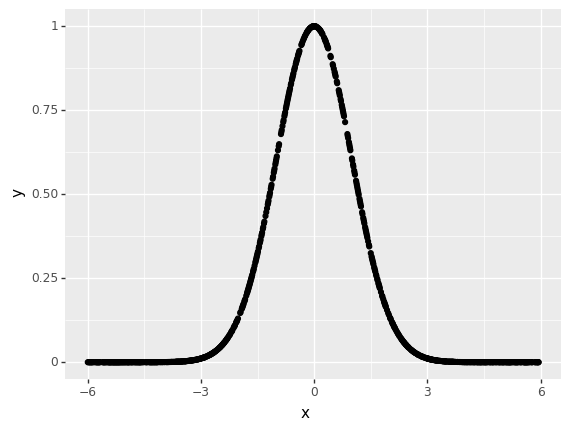

<ggplot: (8790036513012)>

In [178]:
from plotnine import *

(
    ggplot(pd.DataFrame({'x': x_train, 'y': y_train}), aes('x', 'y'))
    + geom_point()
)

In [194]:
tf.random.set_seed(42)

model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=[1]),
    tf.keras.layers.Dense(2, activation='relu'),
    tf.keras.layers.Dense(1)
])

# optimizer = tf.keras.optimizers.SGD(learning_rate=0.03)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.03)
model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['RootMeanSquaredError'])

history = model.fit(x_train, y_train, epochs=300, validation_data=(x_valid, y_valid))

w2_0, b2_0 = model.layers[0].get_weights()
w2_1, b2_1 = model.layers[1].get_weights()

Epoch 1/300
25/25 [==============================] - 1s 7ms/step - loss: 0.1619 - root_mean_squared_error: 0.4024 - val_loss: 0.0760 - val_root_mean_squared_error: 0.2756
Epoch 2/300
25/25 [==============================] - 0s 3ms/step - loss: 0.0739 - root_mean_squared_error: 0.2719 - val_loss: 0.0705 - val_root_mean_squared_error: 0.2655
Epoch 3/300
25/25 [==============================] - 0s 3ms/step - loss: 0.0646 - root_mean_squared_error: 0.2541 - val_loss: 0.0679 - val_root_mean_squared_error: 0.2606
Epoch 4/300
25/25 [==============================] - 0s 3ms/step - loss: 0.0617 - root_mean_squared_error: 0.2484 - val_loss: 0.0623 - val_root_mean_squared_error: 0.2496
Epoch 5/300
25/25 [==============================] - 0s 3ms/step - loss: 0.0557 - root_mean_squared_error: 0.2361 - val_loss: 0.0588 - val_root_mean_squared_error: 0.2424
Epoch 6/300
25/25 [==============================] - 0s 3ms/step - loss: 0.0523 - root_mean_squared_error: 0.2286 - val_loss: 0.0529 - val_root_m

In [191]:
tf.random.set_seed(42)

model5 = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=[1]),
    tf.keras.layers.Dense(5, activation='relu'),
    tf.keras.layers.Dense(1)
])

# optimizer = tf.keras.optimizers.SGD(learning_rate=0.03)
optimizer = tf.keras.optimizers.Adam(learning_rate=0.03)
model5.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['RootMeanSquaredError'])

history = model5.fit(x_train, y_train, epochs=300, validation_data=(x_valid, y_valid))

w5_0, b5_0 = model5.layers[0].get_weights()
w5_1, b5_1 = model5.layers[1].get_weights()

Epoch 1/300
25/25 [==============================] - 1s 7ms/step - loss: 0.1151 - root_mean_squared_error: 0.3393 - val_loss: 0.0568 - val_root_mean_squared_error: 0.2382
Epoch 2/300
25/25 [==============================] - 0s 3ms/step - loss: 0.0436 - root_mean_squared_error: 0.2088 - val_loss: 0.0387 - val_root_mean_squared_error: 0.1968
Epoch 3/300
25/25 [==============================] - 0s 3ms/step - loss: 0.0343 - root_mean_squared_error: 0.1852 - val_loss: 0.0365 - val_root_mean_squared_error: 0.1909
Epoch 4/300
25/25 [==============================] - 0s 3ms/step - loss: 0.0332 - root_mean_squared_error: 0.1823 - val_loss: 0.0305 - val_root_mean_squared_error: 0.1748
Epoch 5/300
25/25 [==============================] - 0s 3ms/step - loss: 0.0295 - root_mean_squared_error: 0.1718 - val_loss: 0.0292 - val_root_mean_squared_error: 0.1709
Epoch 6/300
25/25 [==============================] - 0s 3ms/step - loss: 0.0288 - root_mean_squared_error: 0.1698 - val_loss: 0.0259 - val_root_m

In [ ]:
w2_1

In [203]:
def relu(x):
    return np.maximum(0, x)

model_fit_df = pd.DataFrame({
    'x': x,
    'y_true': y,
    'y_pred_2hidden_h1': w2_1[0][0] * relu(w2_0[0][0] * x + b2_0[0]) + b2_1[0],
    'y_pred_2hidden_h2': w2_1[1][0] * relu(w2_0[0][1] * x + b2_0[1]),
    'y_pred_2hidden': (
        # 0.21 * relu(-0.0234 * x - 0.45)
        # + (-0.31) * relu(0.056 * x - 0.45)
        # + 0.085
        w2_1[0][0] * relu(w2_0[0][0] * x + b2_0[0])
        + w2_1[1][0] * relu(w2_0[0][1] * x + b2_0[1])
        + b2_1[0]
    ),
    'y_pred_5hidden': (
         w5_1[0][0] * relu(w5_0[0][0] * x + b5_0[0])
        + w5_1[1][0] * relu(w5_0[0][1] * x + b5_0[1])
        + w5_1[2][0] * relu(w5_0[0][2] * x + b5_0[2])
        + w5_1[3][0] * relu(w5_0[0][3] * x + b5_0[3])
        + w5_1[4][0] * relu(w5_0[0][4] * x + b5_0[4])
        + b5_1[0]
    )
})

model_fit_df

,x,y_true,y_pred_2hidden_h1,y_pred_2hidden_h2,y_pred_2hidden,y_pred_5hidden
0,5.78,5.564910e-08,0.017783,0.000000,0.017783,0.013215
1,2.65,2.985957e-02,0.017783,0.000000,0.017783,0.041334
2,-4.99,3.917527e-06,-3.080940,3.069545,-0.011395,-0.026785
3,-1.61,2.736104e-01,-1.151245,1.661687,0.510442,0.278178
4,-5.42,4.178263e-07,-3.326433,3.248651,-0.077782,-0.034660
...,...,...,...,...,...,...
1195,4.44,5.238973e-05,0.017783,0.000000,0.017783,0.025253
1196,4.95,4.779140e-06,0.017783,0.000000,0.017783,0.020672
1197,5.30,7.949394e-07,0.017783,0.000000,0.017783,0.017527
1198,2.60,3.404745e-02,0.017783,0.000000,0.017783,0.041783


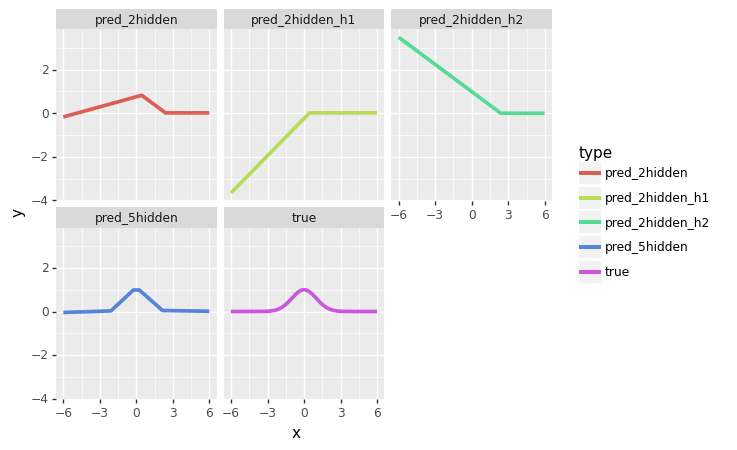

<ggplot: (8789944636820)>

In [205]:
model_fit_long_df = model_fit_df.melt(id_vars='x', value_name='y', var_name='type')
model_fit_long_df['type'] = model_fit_long_df['type'].replace("y_", "", regex=True)

(
    ggplot(model_fit_long_df, aes('x', 'y', color='type'))
    + geom_line(size=1.5)
    + facet_wrap('~ type')
    # + scale_y_continuous(limits=[0, 1.1])
)

In [56]:
model.layers[1].get_weights()


[array([[-3.509159 ],
        [ 3.0916133]], dtype=float32),
 array([11.85248], dtype=float32)]